In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./cleaned_data.csv')

In [2]:
# Create bins for age data

bins = [0,30,40,50,60,70,np.inf]
names = ['18-30','30-40','40-50','50-60','60-70','70+']
df['AGERANGE'] = pd.cut(df['AGE'],bins,labels=names)

# Defining Later Labels

happy = ['Very Happy','Pretty Happy','Not Happy']
happy2 = ['Not Happy','Pretty Happy','Very Happy']
colors = ['limegreen','cornflowerblue','crimson']
life = ['Dull','Routine','Exciting']

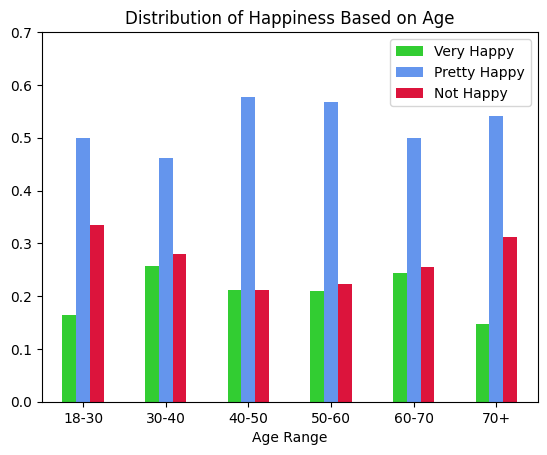

In [3]:
# Cross-tabulate and plot age ranges with happiness

happyage = pd.crosstab(df['AGERANGE'],df['HAPPY'],normalize='index')
ax3 = happyage.plot.bar(rot=0,xlabel='Age Range',ylim=(0,0.7),title='Distribution of Happiness Based on Age',color=colors)
ax3.legend(labels=happy)
plt.savefig('Happiness_Age.pdf')

In [4]:
# Create bins for income data

cbins = [0,25000,50000,75000,100000,np.inf]
cnames = ['<25k','25k-50k','50k-75k','75k-100k','>100k']
df['INCRANGE'] = pd.cut(df['CONINC'],cbins,labels=cnames)

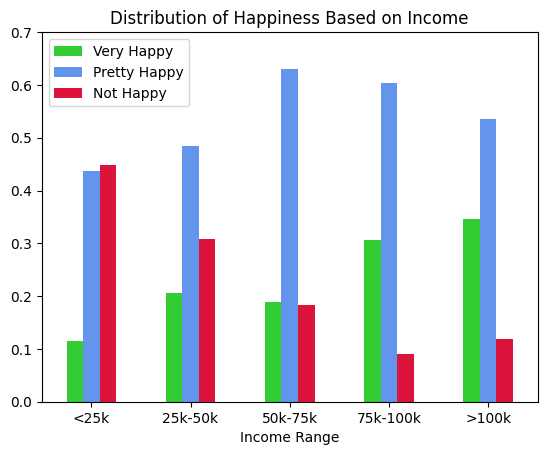

In [5]:
# Cross-tabulate and graph income ranges with happiness

happyinc = pd.crosstab(df['INCRANGE'],df['HAPPY'],normalize='index')
ax4 = happyinc.plot.bar(rot=0,xlabel='Income Range',ylim=(0,0.7),title='Distribution of Happiness Based on Income',color=colors)
ax4.legend(labels=happy)
plt.savefig('Happiness_Income.pdf')

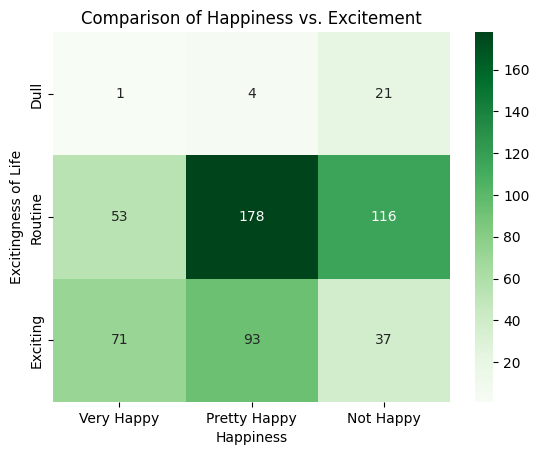

In [6]:
# Cross-tabulate and reverse (for graphical sense) happiness and excitement data

happylife = pd.crosstab(df['LIFE'],df['HAPPY'])
hlreverse = happylife.iloc[::-1]

# Graph happiness and excitement data

ax = sns.heatmap(hlreverse, annot=True,cmap='Greens',fmt='g',xticklabels=happy,yticklabels=life)
ax.set(xlabel='Happiness',ylabel='Excitingness of Life',title='Comparison of Happiness vs. Excitement')
plt.show
plt.savefig('Happiness_Life.pdf')

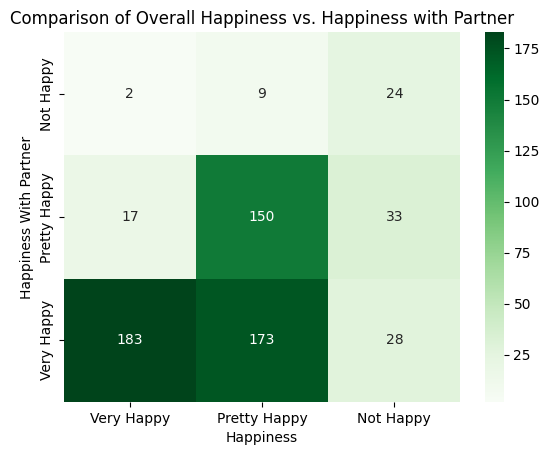

In [7]:
# Cross-tabulate and reverse (for graphical sense) happiness data, for both overall and specifically with partner

happypartner = pd.crosstab(df['HAPPARTNER'],df['HAPPY'])
happypartner
hpreverse = happypartner.iloc[::-1]

# Graph data for happiness, both overall and specifically with partner
ax2 = sns.heatmap(hpreverse, annot=True,cmap='Greens',fmt='g',xticklabels=happy,yticklabels=happy2)
ax2.set(xlabel='Happiness',ylabel='Happiness With Partner',title='Comparison of Overall Happiness vs. Happiness with Partner')
plt.show
plt.savefig('Happiness_Partner.pdf')